
# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [3]:
customers = pd.read_csv('Ecommerce Customers')

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

In [7]:
sns.set_style('darkgrid')

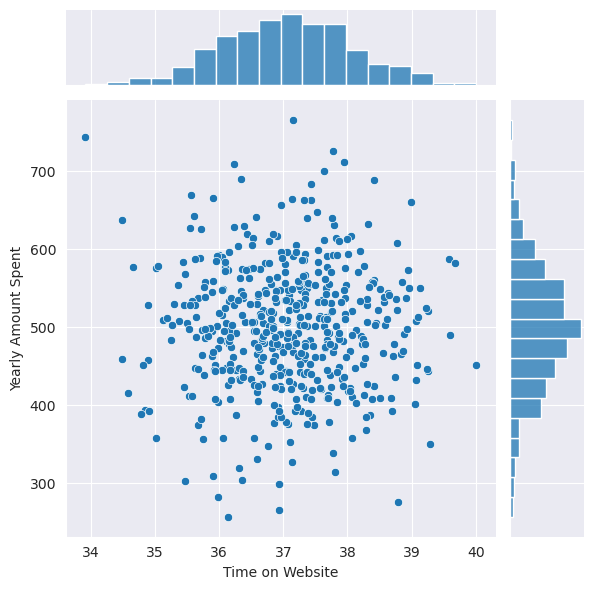

In [8]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers)

** Do the same but with the Time on App column instead. **

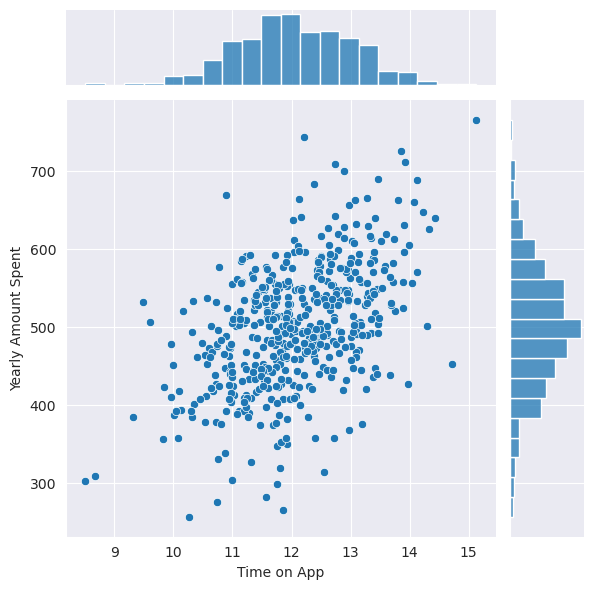

In [9]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers)

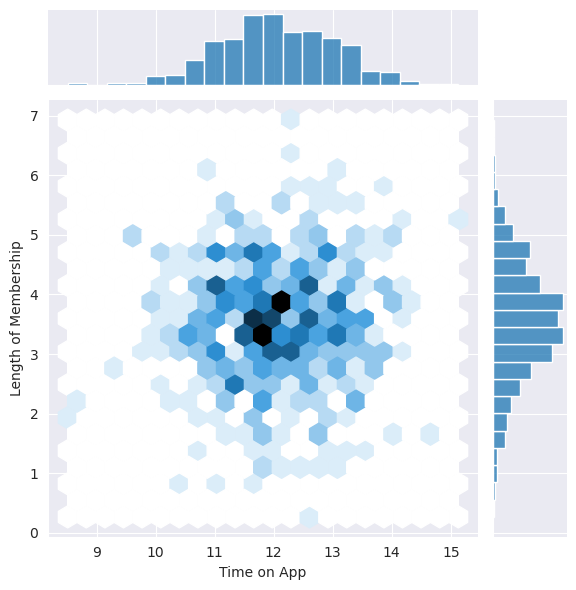

In [10]:
sns.jointplot(x='Time on App', y='Length of Membership', data=customers, kind='hex')

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

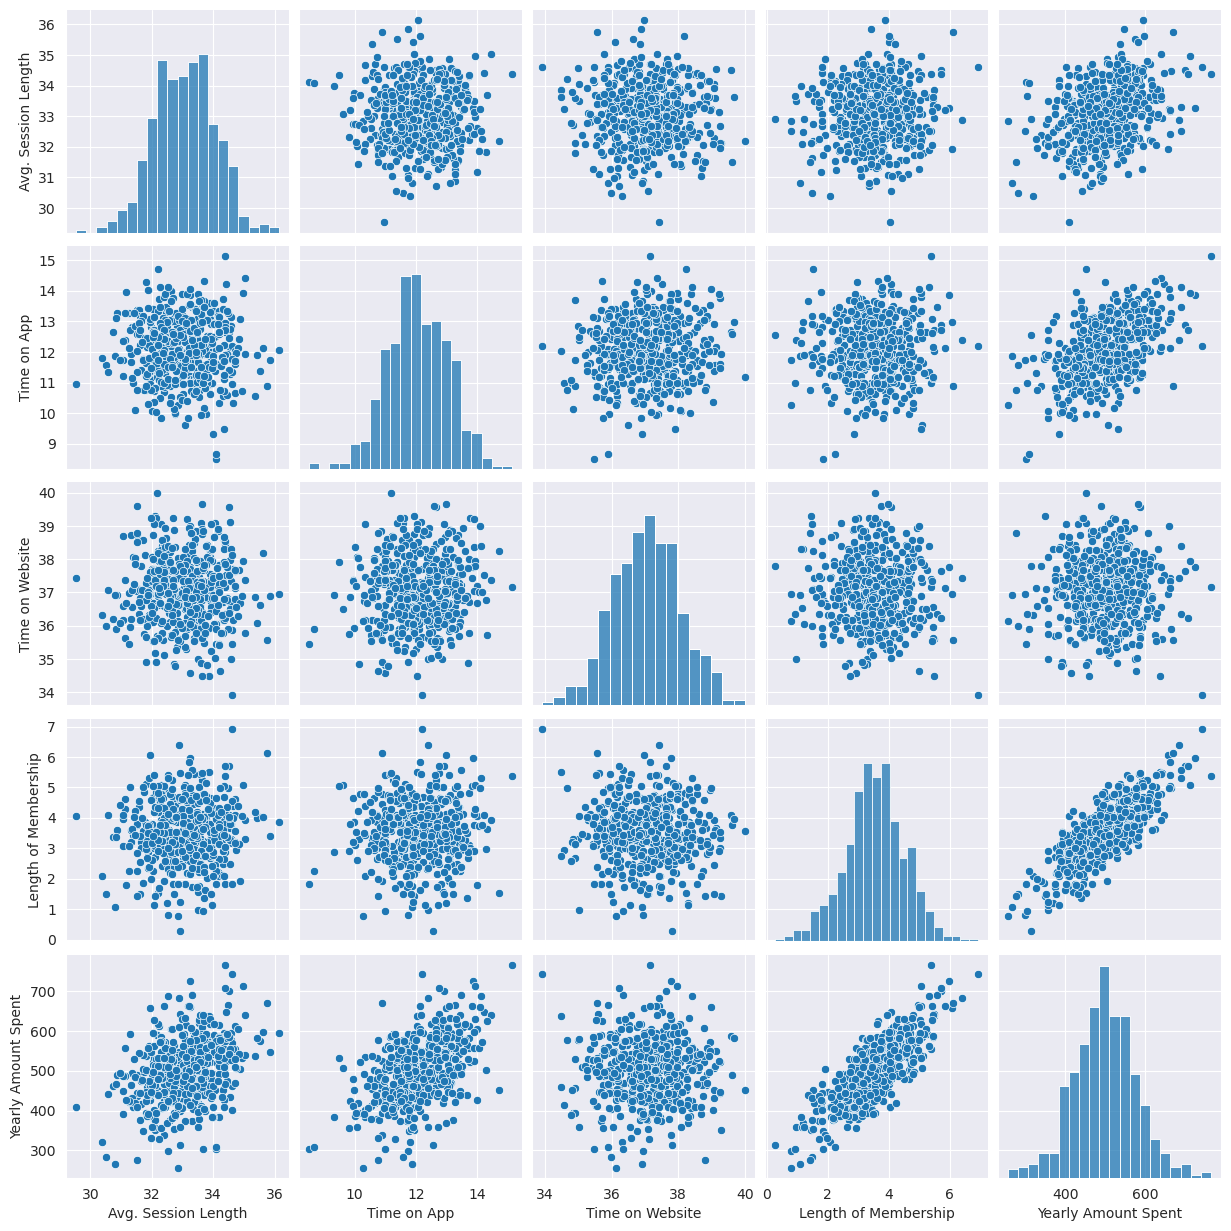

In [11]:
sns.pairplot(data=customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

Length of membership appears to be the most correlated feature based off of the plot.

### Basic Linear Model

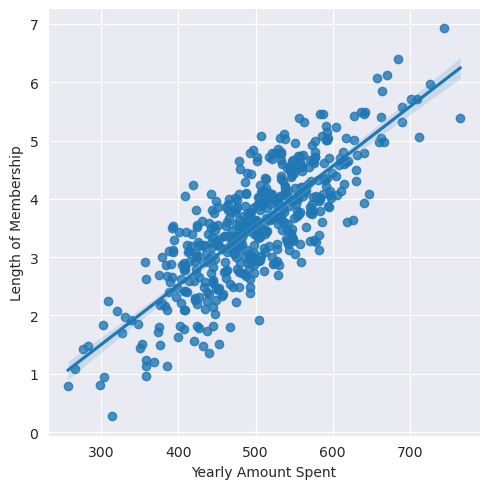

In [12]:
sns.lmplot(x='Yearly Amount Spent', y='Length of Membership', data=customers)

## Training and Testing Data

In [13]:
X = ['Avg. Session Length', 'Time on App',
    'Time on Website', 'Length of Membership']

In [14]:
y = customers['Yearly Amount Spent']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(customers[X], y, test_size=0.3, random_state=101)

## Training the Model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data

In [21]:
pred = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

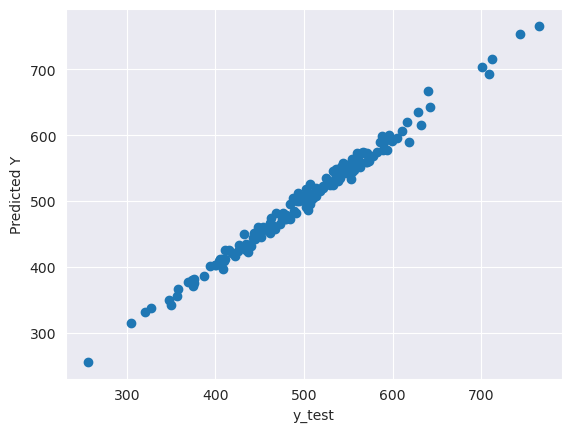

In [22]:
plt.scatter(y_test, pred)
plt.xlabel("y_test")
plt.ylabel("Predicted Y")

## Evaluating the Model

In [23]:
import sklearn.metrics as metrics

In [24]:
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = mse**0.5

In [25]:
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  7.228148653430832
MSE:  79.81305165097444
RMSE:  8.933815066978633


## Residuals

/home/jasperwilson99/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

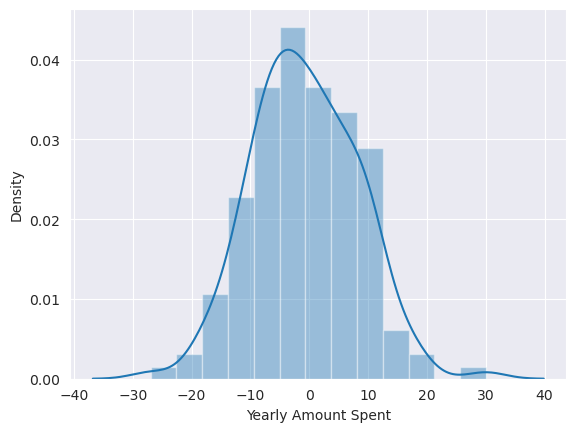

In [26]:
sns.distplot((y_test - pred), kde=True)

## Conclusion

In [29]:
coeff = pd.DataFrame(lm.coef_, X, columns=['Coefficient'])
coeff

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


How can you interpret these coefficients?

- For each minute a user spends (on average) having an advisory session, the user spends £25.98 more per year.

- For each minute the user spends (on average) on the company's app, the user spends £35.59 more per year.

- For each minute the user spends (on average) on the company's website, the user spends £0.19 more per year.

- For each year the user is a member, the user spends (on average) £61.28 more per year.

**Do you think the company should focus more on their mobile app or on their website?**

The company should focus more on its app. A higher average user time on the app will lead to higher marginal gains in terms of revenue compared to the website (£35.59 to £0.19). So focusing on increasing engagement on the app should be beneficial to the company's bottom line.